# NNTI Assignment 3

Linear Regression is a useful method to know of, but it can only model linear relationships. The problem is that real world datasets can have a lot of non-linear relationships as well. In such cases, non-linear methods are used, one such method is **polynomial regression**.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### a. Data loading: Load the data from the files `X.npy` and `y.npy` and visualize them. [1 point]


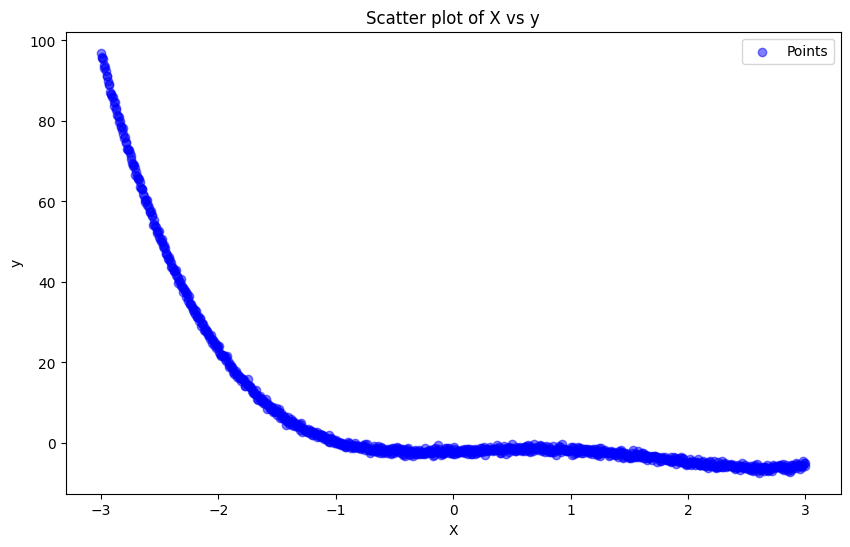

In [25]:
# Load the data
X = np.load("/Users/shaique/Desktop/BioInf_IMP/Bioinf_WS_2024/NNTI/Assignment_sheets/NNTI_Assignment_3/Bonus_(Q3.5)/X.npy")

y = np.load("/Users/shaique/Desktop/BioInf_IMP/Bioinf_WS_2024/NNTI/Assignment_sheets/NNTI_Assignment_3/Bonus_(Q3.5)/y.npy")

# Plot the data
##TODO##
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue' , alpha=0.5 , label='Points')
plt.title('Scatter plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### b. Regression Models: [0.5+1+0.5 points]

i. Build a [Linear Regression](https://scikit-learn.org/1.5/modules/linear_model.html) model on the provided dataset. Calculate and print the RMSE for this model.

ii. Using the given list of polynomial degrees, build [Polynomial Regression](https://scikit-learn.org/1.5/modules/preprocessing.html#generating-polynomial-features) models on the given dataset for each degree and print the RMSE.

iii. Save the predictions for each model (Linear and different versions of  Polynomial) and create a plot to visualize the predictions against the actual data points.


In [26]:
degrees = [2, 3, 4] # Polynomial Regression for different degrees
##TODO##

rmse_scores = {}

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)   
rmse = mean_squared_error(y, y_pred, squared=False)
rmse_scores["Linear"] = rmse  

print(rmse)

15.293374352668407


In [27]:
##Step 2: Polynomial Regression for different degrees
polynomial = {}

for degree in degrees:

    features_polynomial = PolynomialFeatures(degree=degree)

    X_polynomial = features_polynomial.fit_transform(X)

    polynomial_model = LinearRegression()

    polynomial_model.fit(X_polynomial, y)

    y_pred_polynomial = polynomial_model.predict(X_polynomial)

    rmse_polynomial = mean_squared_error(y, y_pred_polynomial, squared=False)

    rmse_scores[f"Polynomial_{degree}"] = rmse_polynomial

    polynomial[degree] = y_pred_polynomial

print(rmse_scores)


{'Linear': 15.293374352668407, 'Polynomial_2': 8.743763105062023, 'Polynomial_3': 3.101353771070473, 'Polynomial_4': 0.48757578740958213}


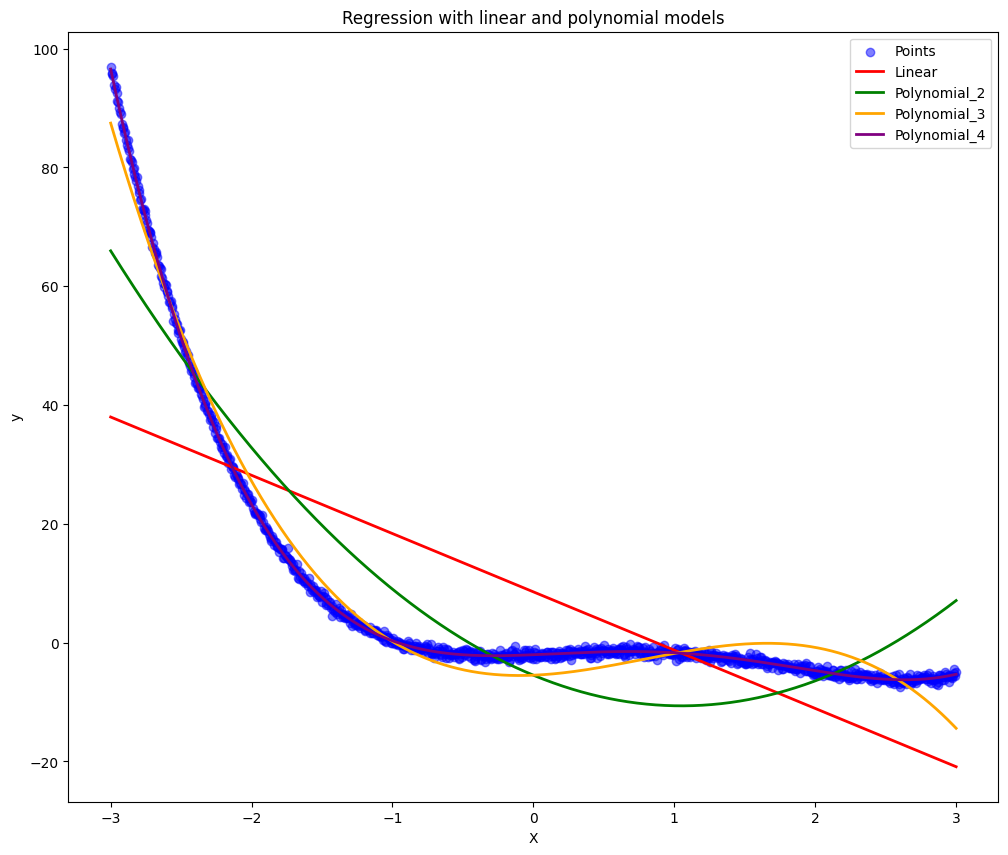

In [28]:
# Print summary of RMSE scores
##TODO##

plt.figure(figsize=(12,10))
plt.scatter(X, y, color='blue', alpha=0.5, label='Points')

plt.plot(X , y_pred , color='red', label='Linear' , linewidth=2)
plt.plot(X , polynomial[2] , color='green', label='Polynomial_2' , linewidth=2)
plt.plot(X , polynomial[3] , color='orange', label='Polynomial_3' , linewidth=2)
plt.plot(X , polynomial[4] , color='purple', label='Polynomial_4' , linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression with linear and polynomial models')
plt.legend()
plt.show()